In [41]:
from google.colab import files
uploaded = files.upload()

import io, pandas as pd
fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
df.shape

Saving diamonds.csv to diamonds.csv


(53940, 10)

In [42]:
df.columns = df.columns.str.strip()

df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [43]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [44]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


In [45]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
# treat zeros as missing in dimensions (common in diamonds dataset)
for col in ['x','y','z']:
    print(col, (df[col]==0).sum())

# replace 0 -> NaN for x,y,z
df[['x','y','z']] = df[['x','y','z']].replace(0, pd.NA)

# count now
df[['x','y','z']].isna().sum()


x 8
y 7
z 20


,0
x,8
y,7
z,20


In [48]:
# simple method: fill with median
for col in ['x','y','z']:
    df[col] = df[col].fillna(df[col].median())



/tmp/ipython-input-2694884521.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].median())
/tmp/ipython-input-2694884521.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].median())
/tmp/ipython-input-2694884521.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] 

In [49]:
# drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

# ensure categorical types
for col in ['cut','color','clarity']:
    df[col] = df[col].astype('category')



In [50]:
# feature engineering
df['volume'] = df['x'] * df['y'] * df['z']
df['price_per_carat'] = df['price'] / df['carat']
df['dim_ratio'] = (df['x'] + df['y']) / (2 * df['z'])

# carat category
def carat_cat(c):
    if c < 0.5: return 'light'
    if c <= 1.5: return 'medium'
    return 'heavy'
df['carat_cat'] = df['carat'].apply(carat_cat).astype('category')



In [51]:
# IQR capping function
def cap_outliers_iqr(series, lower_q=0.25, upper_q=0.75):
    q1 = series.quantile(lower_q)
    q3 = series.quantile(upper_q)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series.clip(lower, upper)

numeric_cols = ['carat','price','x','y','z','volume','price_per_carat']
for col in numeric_cols:
    df[col] = cap_outliers_iqr(df[col])



In [52]:
# check skew
skewness = df[numeric_cols].skew().sort_values(ascending=False)
skewness


,0
price,1.148606
volume,0.916261
price_per_carat,0.899873
carat,0.899170
x,0.392713
y,0.388437
z,0.384730


In [53]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)  # doesn't require strictly positive

cols_to_transform = ['carat','volume','price_per_carat','x','y','z']  # exclude 'price' for now or include if helpful
df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])


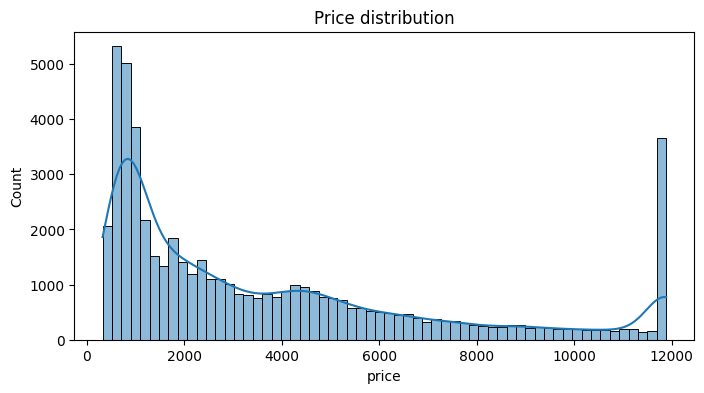

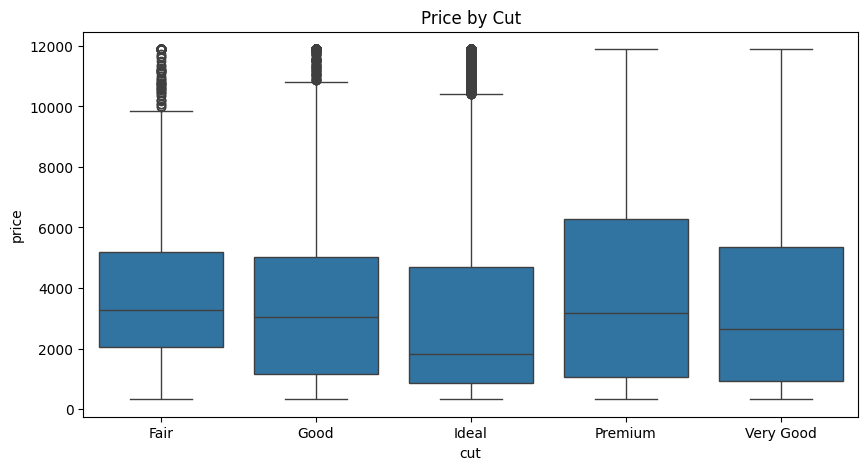

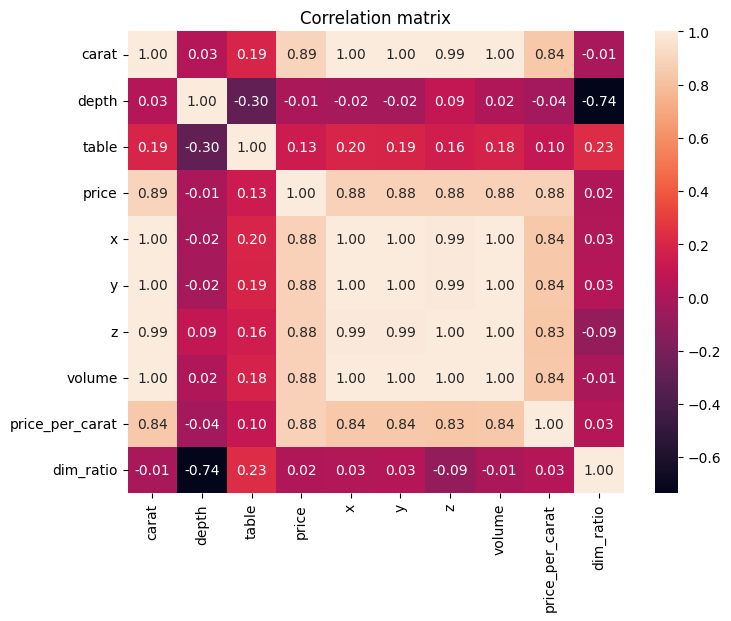

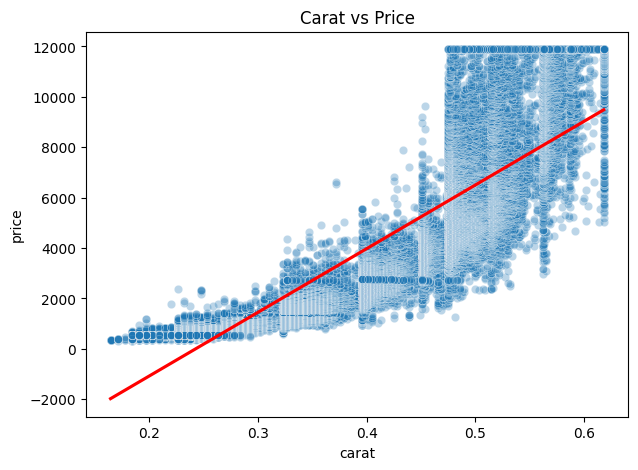

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution - price
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=60, kde=True)
plt.title('Price distribution')
plt.show()

# boxplots - price vs cut
plt.figure(figsize=(10,5))
sns.boxplot(x='cut', y='price', data=df)
plt.title('Price by Cut')
plt.show()

# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f')
plt.title('Correlation matrix')
plt.show()

# scatter - carat vs price
plt.figure(figsize=(7,5))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.3)
sns.regplot(x='carat', y='price', data=df, scatter=False, color='r')
plt.title('Carat vs Price')
plt.show()


cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64


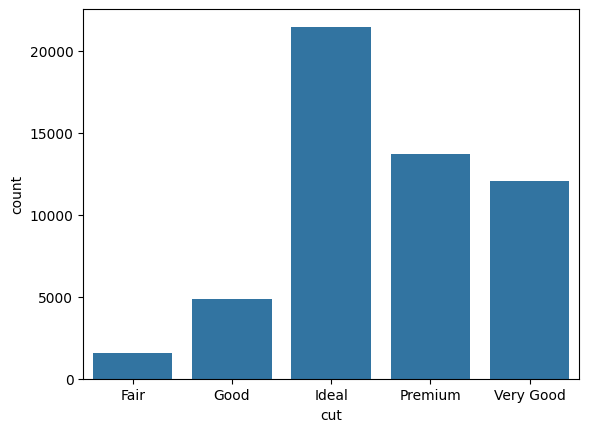

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64


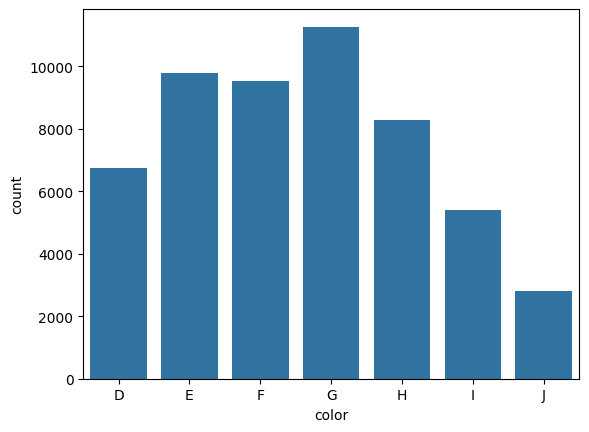

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64


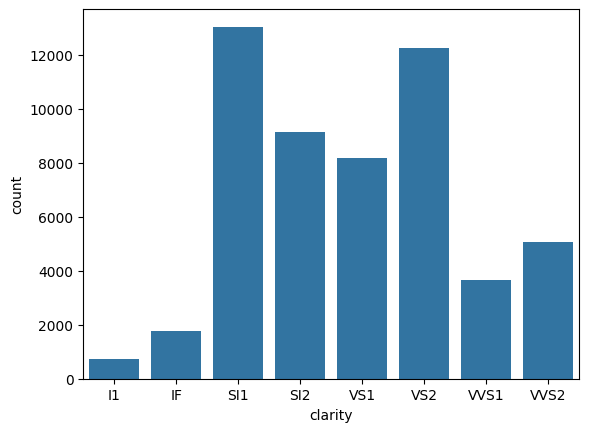

carat_cat
medium    30768
light     17608
heavy      5418
Name: count, dtype: int64


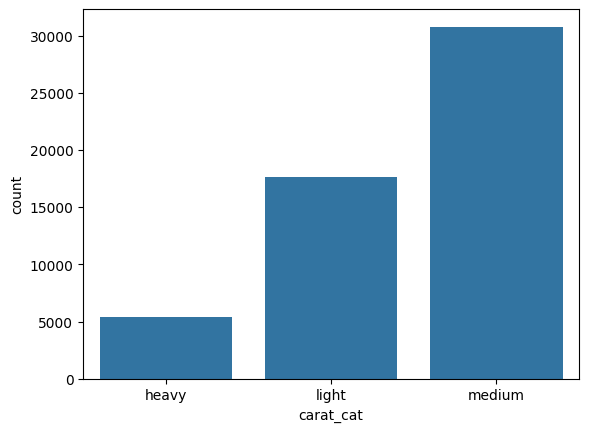

In [55]:
for col in ['cut','color','clarity','carat_cat']:
    print(df[col].value_counts())
    sns.countplot(x=col, data=df)
    plt.show()


In [56]:
# Ordinal mapping (common ordering for diamonds)
cut_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_map = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}   # D best -> higher
clarity_map = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

df['cut_ord'] = df['cut'].map(cut_map)
df['color_ord'] = df['color'].map(color_map)
df['clarity_ord'] = df['clarity'].map(clarity_map)

#  one-hot encode for some models:
df = pd.get_dummies(df, columns=['carat_cat'], drop_first=True)


In [57]:
#Feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


features = ['carat','x','y','z','depth','table','volume','price_per_carat','dim_ratio','cut_ord','color_ord','clarity_ord'] + [c for c in df.columns if c.startswith('carat_cat_')]
X = df[features]
y = df['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(20)


,0
price_per_carat,0.721648
volume,0.147053
y,0.074683
carat,0.053472
x,0.001905
z,0.000416
color_ord,0.000246
clarity_ord,0.000204
carat_cat_light,0.000178
carat_cat_medium,0.000060


In [58]:
top_features = importances.head(10).index.tolist()
top_features


['price_per_carat',
 'volume',
 'y',
 'carat',
 'x',
 'z',
 'color_ord',
 'clarity_ord',
 'carat_cat_light',
 'carat_cat_medium']

In [59]:
#Prepare data for modeling (scaling)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_top = X[top_features].copy()
X_scaled = scaler.fit_transform(X_top)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [61]:
#TrainML regressors and evaluate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    'Linear': LinearRegression(),
    'RF': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE':mae, 'RMSE':rmse, 'R2':r2}
results_df = pd.DataFrame(results).T
results_df


,MAE,RMSE,R2
Linear,624.184905,839.835683,0.938145
RF,14.987964,77.767310,0.999470
KNN,59.260993,145.708095,0.998138


In [62]:
#  XGBoost
!pip install xgboost -q
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [64]:
#ANN (PyTorch) for price prediction
# Install torch if not present (Colab usually has it)
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# Prepare data - convert to tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_t  = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_t = torch.tensor(y_train.values.reshape(-1,1), dtype=torch.float32).to(device)
y_test_t  = torch.tensor(y_test.values.reshape(-1,1), dtype=torch.float32).to(device)

train_ds = TensorDataset(X_train_t, y_train_t)
test_ds  = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_ds, batch_size=256, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=256, shuffle=False)

# Define model
class DiamondNet(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,1)
        )
    def forward(self, x):
        return self.net(x)

model = DiamondNet(X_train_t.shape[1]).to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Training loop with simple early stopping
epochs = 60
best_val_loss = float('inf')
patience = 8
counter = 0

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        preds = model(xb)
        loss = loss_fn(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)
    train_loss = running_loss / len(train_loader.dataset)

    # validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in test_loader:
            preds = model(xb)
            val_loss += loss_fn(preds, yb).item() * xb.size(0)
    val_loss /= len(test_loader.dataset)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), '/tmp/pytorch_diamond_model.pth')
        counter = 0
    else:
        counter += 1
    if counter >= patience:
        print(f'Early stopping at epoch {epoch}')
        break

    if epoch % 5 == 0 or epoch==epochs-1:
        print(f'Epoch {epoch}: train_loss={train_loss:.4f} val_loss={val_loss:.4f}')

Device: cpu
Epoch 0: train_loss=25599539.2485 val_loss=24093489.1598
Epoch 5: train_loss=364159.2730 val_loss=103869.3688
Epoch 10: train_loss=119606.8808 val_loss=40774.5695
Epoch 15: train_loss=94317.2688 val_loss=18407.5167
Epoch 20: train_loss=79025.0241 val_loss=18596.9867
Epoch 25: train_loss=81209.2554 val_loss=36177.9087
Epoch 30: train_loss=78081.1564 val_loss=35573.7774
Epoch 35: train_loss=64191.8847 val_loss=21707.8964
Epoch 40: train_loss=62100.7905 val_loss=13124.0009
Early stopping at epoch 45


In [66]:
# load best model and evaluate
model.load_state_dict(torch.load('/tmp/pytorch_diamond_model.pth'))
model.eval()
with torch.no_grad():
    preds = model(X_test_t).cpu().numpy().flatten()
    y_true = y_test_t.cpu().numpy().flatten()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_true, preds)
mse = mean_squared_error(y_true, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, preds)
print('PyTorch ANN results -> MAE:',mae,'RMSE:',rmse,'R2:',r2)

PyTorch ANN results -> MAE: 47.6751823425293 RMSE: 91.47795264604746 R2: 0.9992661476135254


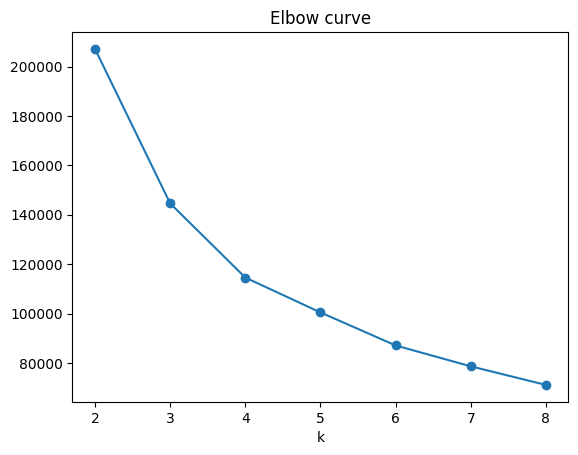

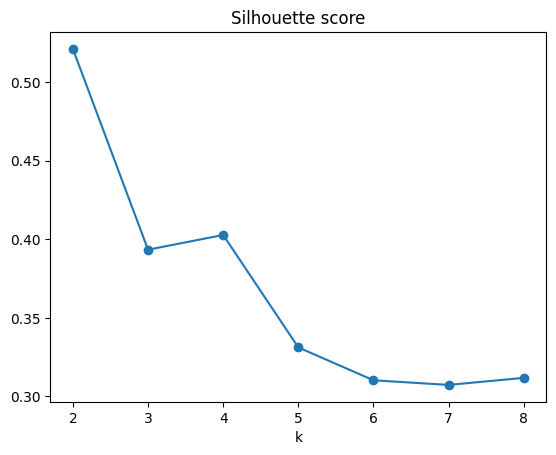

In [70]:
#Clustering (Market segmentation)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# prepare clustering data: use top_features but remove price_per_carat
cluster_features = top_features.copy()
# ensure price is not in features
cluster_features = [c for c in cluster_features if c != 'price' and c != 'price_per_carat']

X_cluster = df[cluster_features].copy()

# Fit a new scaler on the clustering data
cluster_scaler = StandardScaler()
X_cluster_scaled = cluster_scaler.fit_transform(X_cluster)

# Find ideal k using elbow/silhouette
sse = []
sil = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_cluster_scaled)
    sse.append(km.inertia_)
    sil.append(silhouette_score(X_cluster_scaled, km.labels_))

# Plot elbow & silhouette
import matplotlib.pyplot as plt
plt.plot(K, sse, '-o'); plt.title('Elbow curve'); plt.xlabel('k'); plt.show()
plt.plot(K, sil, '-o'); plt.title('Silhouette score'); plt.xlabel('k'); plt.show()

In [72]:
k_opt = 4
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
# Fit KMeans on scaled data as before
kmeans.fit(X_cluster_scaled) # Use X_cluster_scaled here as per the previous cell
df['cluster'] = kmeans.labels_

# Convert ordinal columns back to int for aggregation
for col in ['cut_ord','color_ord','clarity_ord']:
    df[col] = df[col].astype(int)

# analyze clusters
cluster_summary = df.groupby('cluster').agg({
    'price':['mean','median'],
    'carat':['mean'],
    'cut_ord':'mean',
    'color_ord':'mean',
    'clarity_ord':'mean',
    'volume':'mean'
})
cluster_summary

price                carat   cut_ord color_ord clarity_ord  \
                 mean     median      mean      mean      mean        mean   
cluster                                                                      
0          792.239777    765.000  0.248963  4.137778  4.726488    4.859496   
1         5691.238289   5135.000  0.488124  3.689414  4.080648    3.456316   
2         2204.827228   2060.000  0.367872  3.938487  4.869939    4.104542   
3        10771.862856  11890.375  0.591452  3.749908  3.265608    3.210750   

           volume  
             mean  
cluster            
0        3.476891  
1        4.259960  
2        3.893238  
3        4.586347


Cluster summary for naming:
                 price                carat   cut_ord color_ord clarity_ord  \
                 mean     median      mean      mean      mean        mean   
cluster                                                                      
0          792.239777    765.000  0.248963  4.137778  4.726488    4.859496   
1         5691.238289   5135.000  0.488124  3.689414  4.080648    3.456316   
2         2204.827228   2060.000  0.367872  3.938487  4.869939    4.104542   
3        10771.862856  11890.375  0.591452  3.749908  3.265608    3.210750   

           volume  
             mean  
cluster            
0        3.476891  
1        4.259960  
2        3.893238  
3        4.586347  

Average values per cluster:
    cluster         price     carat   cut_ord
3        3  10771.862856  0.591452  3.749908
1        1   5691.238289  0.488124  3.689414
2        2   2204.827228  0.367872  3.938487
0        0    792.239777  0.248963  4.137778

Cluster ID to Name mapping:

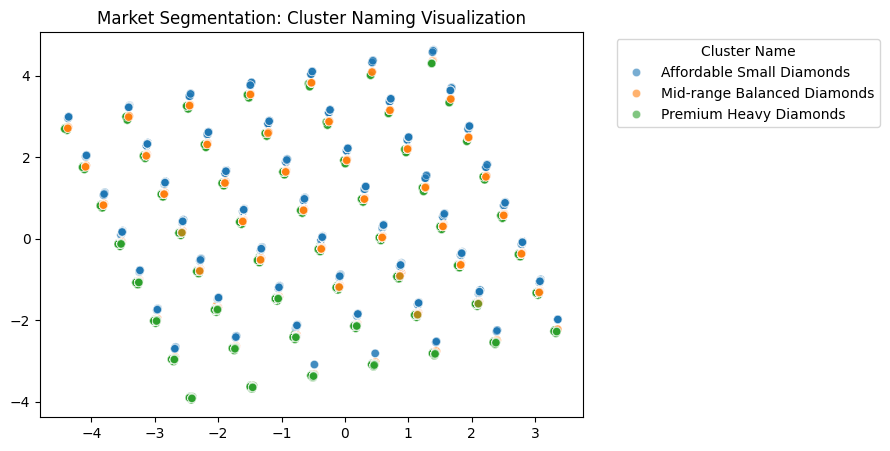

Saved diamonds_with_cluster_names.csv with descriptive cluster names to /tmp


In [81]:
# Cluster Naming Approach (Business Interpretation)


# Analyze average price, carat, and cut across clusters
print("\nCluster summary for naming:\n", cluster_summary)

# Compute key metrics per cluster for naming
summary_simple = df.groupby('cluster')[['price', 'carat', 'cut_ord']].mean().reset_index()
summary_simple = summary_simple.sort_values('price', ascending=False)
print("\nAverage values per cluster:\n", summary_simple)

# Assign descriptive cluster names based on patterns
# You can tweak thresholds or use percentile cutoffs for automatic naming
cluster_names = {}
for i, row in summary_simple.iterrows():
    cluster_id = int(row['cluster'])
    avg_price = row['price']
    avg_carat = row['carat']
    avg_cut = row['cut_ord']

    # Naming logic based on relative price/carat
    if avg_carat > df['carat'].quantile(0.75) and avg_price > df['price'].quantile(0.75):
        name = "Premium Heavy Diamonds"
    elif avg_carat < df['carat'].quantile(0.25) and avg_price < df['price'].quantile(0.25):
        name = "Affordable Small Diamonds"
    elif avg_carat < df['carat'].quantile(0.5) and avg_price > df['price'].quantile(0.5):
        name = "High-Value Small Diamonds"
    else:
        name = "Mid-range Balanced Diamonds"

    cluster_names[cluster_id] = name

# Map cluster names back to main DataFrame
df['cluster_name'] = df['cluster'].map(cluster_names)

# Display mapping
print("\nCluster ID to Name mapping:")
for k, v in cluster_names.items():
    print(f"Cluster {k}: {v}")

# Visualize clusters by name
plt.figure(figsize=(7,5))
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=df['cluster_name'], palette='tab10', alpha=0.6)
plt.title('Market Segmentation: Cluster Naming Visualization')
plt.legend(title='Cluster Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Save updated cluster-named DataFrame
df.to_csv('/tmp/diamonds_with_cluster_names.csv', index=False)
print("Saved diamonds_with_cluster_names.csv with descriptive cluster names to /tmp")

In [82]:
joblib.dump(kmeans, '/tmp/kmeans_model.pkl')


['/tmp/kmeans_model.pkl']

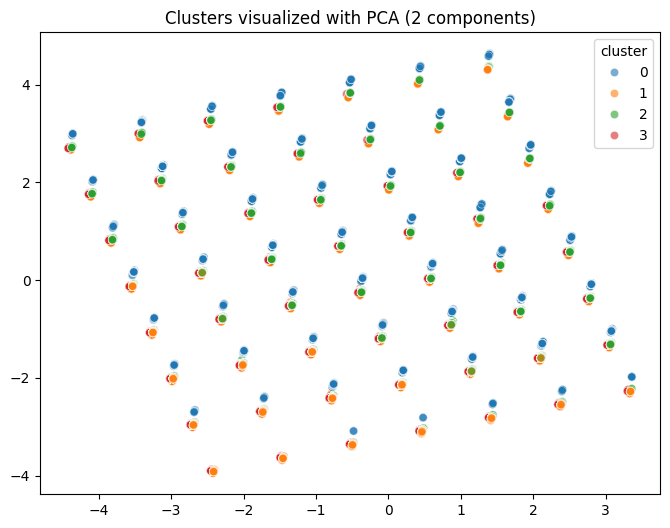

In [83]:
#PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(X_cluster)
plt.figure(figsize=(8,6))
sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=df['cluster'], palette='tab10', alpha=0.6)
plt.title('Clusters visualized with PCA (2 components)')
plt.show()


In [84]:
#Model evaluation recap


ann_res = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
results_df.loc['PyTorch_ANN'] = ann_res
results_df


,MAE,RMSE,R2
Linear,624.184905,839.835683,0.938145
RF,14.987964,77.767310,0.999470
KNN,59.260993,145.708095,0.998138
XGBoost,24.838107,73.709245,0.999524
PyTorch_ANN,47.675182,91.477953,0.999266


In [110]:
from google.colab import files
uploaded = files.upload()

Saving app.py to app.py


In [111]:
from google.colab import files
files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
from google.colab import files
uploaded = files.upload()

Saving isrgrootx1 (1).pem to isrgrootx1 (1).pem


In [112]:
!ls

 app.py					    'isrgrootx1 (1).pem'
'cover_type (1).csv'			     ngrok
 diamonds.csv				     ngrok.zip
 EcoType_Colab_Notebook.ipynb		     sample_data
 Ecotype_Forest_cover_classification.ipynb   streamlit.log


In [100]:
!wget -q -O ngrok.zip https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
!unzip -o ngrok.zip

Archive:  ngrok.zip
  inflating: ngrok                   


In [102]:
!pip install pyngrok -q

In [103]:
from pyngrok import ngrok, conf
conf.get_default().auth_token = "31UMSjeZERulE5B9MboU22TojhM_6Ffs5zbXgwSwrzyX1nSkw"

In [113]:
!streamlit run app.py --server.port 8501 &>/dev/null&

In [114]:
public_url = ngrok.connect(8501)
print("🌍 Streamlit App URL:", public_url)

🌍 Streamlit App URL: NgrokTunnel: "https://818fd8613365.ngrok-free.app" -> "http://localhost:8501"


# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Visualize clusters with pca

### Subtask:
Use PCA to reduce the dimensionality of the clustering data to 2 components and visualize the clusters in a scatter plot.


## Recap model evaluation

### Subtask:
Display the performance metrics (MAE, RMSE, R2) for all trained regression models (Linear Regression, Random Forest, KNN, XGBoost, and PyTorch ANN) in a single table for easy comparison.


**Reasoning**:
Update the results dictionary with XGBoost and PyTorch ANN metrics and display the combined results in a DataFrame.



## Summary:

### Data Analysis Key Findings

*   The PCA visualization of the clusters was successfully generated, showing the clusters in a 2-dimensional space.
*   The performance metrics (MAE, RMSE, and R2) for all regression models (Linear Regression, Random Forest, KNN, XGBoost, and PyTorch ANN) were successfully compiled and displayed in a single table.

### Insights or Next Steps

*   Analyze the performance metrics table to identify the best-performing regression model for this dataset based on the chosen evaluation criteria.
